In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Handling null values
df.dropna(inplace = True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Counting values

In [10]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [11]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [12]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [13]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [14]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

# Exploratory Data Analysis(EDA)

### Converting Data in proper format like object to datetime

In [15]:
df['Date_of_Journey'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
print(df.Date_of_Journey.dtype)

datetime64[ns]


In [17]:
#Extracting day and creating new columns Journey_day
df['Journey_day'] = df['Date_of_Journey'].dt.day

#Extracting month and creating new columns Journey_day
df['Journey_month'] = df['Date_of_Journey'].dt.day

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1


In [18]:
df.drop(['Date_of_Journey'],axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1


In [19]:
df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time)

C:\Users\Pavan.M\AppData\Local\Temp\ipykernel_4000\2865225901.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time)


In [20]:
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2024-10-17 13:15:00,7h 25m,2 stops,No info,7662,1,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2024-10-17 23:30:00,5h 25m,1 stop,No info,6218,12,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2024-10-17 21:35:00,4h 45m,1 stop,No info,13302,1,1,21,35


In [22]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [23]:
df['Dep_Time'] = pd.to_datetime(df.Dep_Time)
df.head()

C:\Users\Pavan.M\AppData\Local\Temp\ipykernel_4000\1793000227.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df.Dep_Time)


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-10-17 22:20:00,2h 50m,non-stop,No info,3897,24,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-17 05:50:00,7h 25m,2 stops,No info,7662,1,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-17 09:25:00,19h,2 stops,No info,13882,9,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-10-17 18:05:00,5h 25m,1 stop,No info,6218,12,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-10-17 16:50:00,4h 45m,1 stop,No info,13302,1,1,21,35


In [24]:
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute

In [25]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-10-17 22:20:00,2h 50m,non-stop,No info,3897,24,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-17 05:50:00,7h 25m,2 stops,No info,7662,1,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-17 09:25:00,19h,2 stops,No info,13882,9,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-10-17 18:05:00,5h 25m,1 stop,No info,6218,12,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-10-17 16:50:00,4h 45m,1 stop,No info,13302,1,1,21,35,16,50


In [26]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,1,21,35,16,50


In [28]:
# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time
# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [29]:
df['Duration_hours'] = duration_hours
df['Duration_minutes'] = duration_mins
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,1,21,35,16,50,4,45


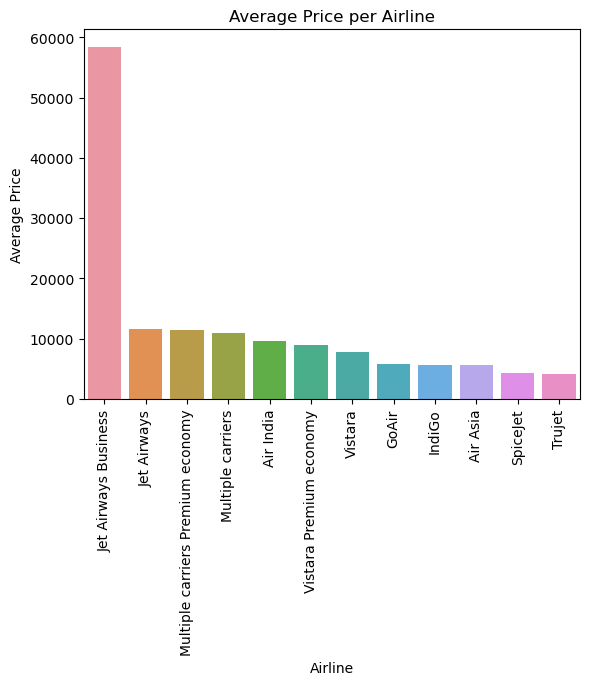

In [30]:
avg_price_per_airline = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_per_airline.index, y=avg_price_per_airline.values)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.ylabel('Average Price')
plt.title('Average Price per Airline')
plt.show()

In [31]:
Airline = df['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head(10)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False


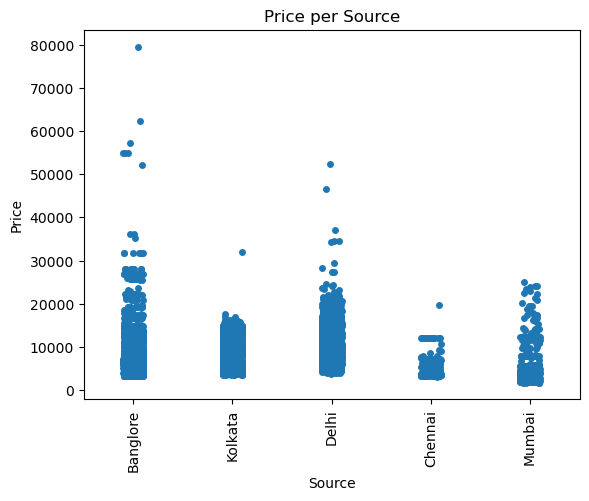

In [32]:
sns.stripplot(x='Source', y='Price', data=df, jitter=True)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Price per Source')
plt.show()

In [33]:
Source = df['Source']
Source = pd.get_dummies(Source, drop_first=True)

In [34]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


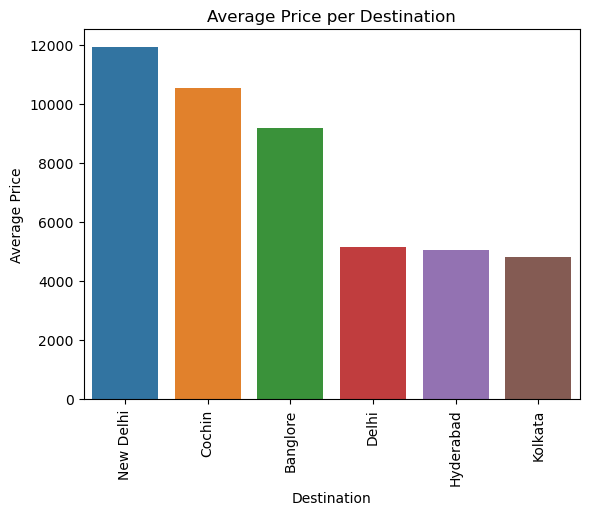

In [35]:
# Graph of Destination vs Price
avg_price_per_destination = df.groupby('Destination')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_per_destination.index, y=avg_price_per_destination.values)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.ylabel('Average Price')
plt.title('Average Price per Destination')
plt.show()

In [36]:
Destination = df['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

In [37]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [38]:
df.drop(['Route'], axis=1, inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,1,21,35,16,50,4,45


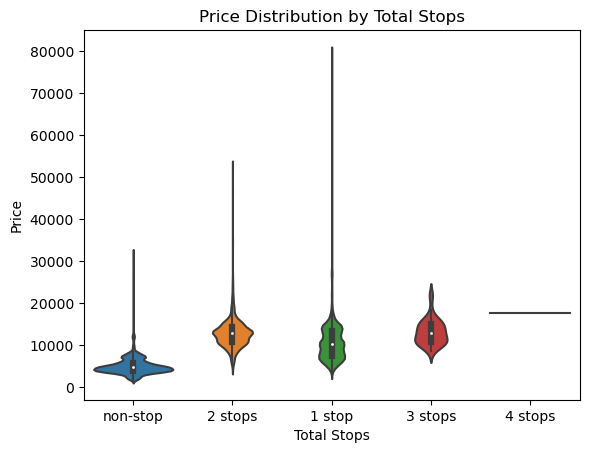

In [40]:
# Graph of Total_Stops vs Price
sns.violinplot(x='Total_Stops', y='Price', data=df)
plt.ylabel('Price')
plt.xlabel('Total Stops')
plt.title('Price Distribution by Total Stops')
plt.show()

In [41]:
# Here Total_stop are categorical so we are converting or replacing to 1,2,3,4 in form of Dict
df.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,1,21,35,16,50,4,45


In [42]:
# Droping Additional_Info bcz here no relation 
df.drop(['Additional_Info'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,1,21,35,16,50,4,45


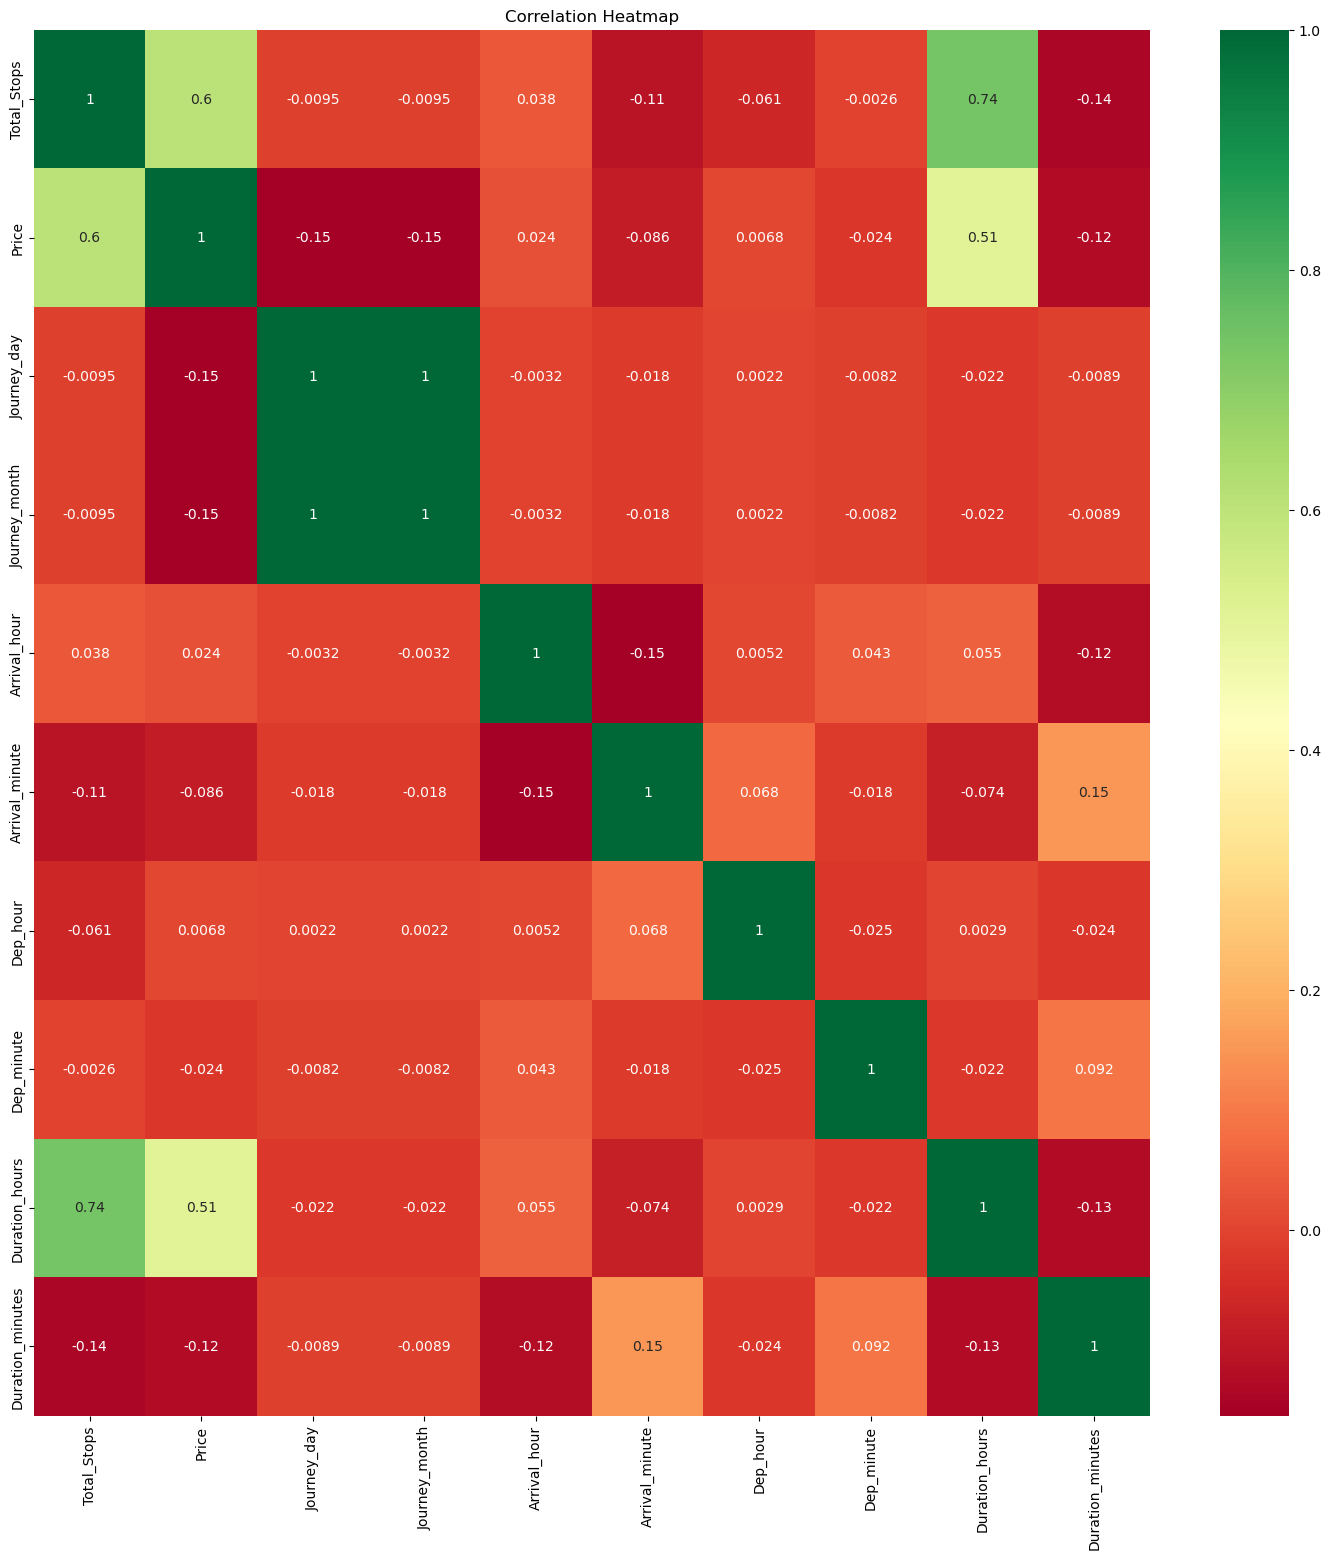

In [46]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Handle missing values (optional: you can choose to fill them or drop rows)
df_numeric = df_numeric.dropna()

# Plot the heatmap with the cleaned data
plt.figure(figsize=(18, 18))
sns.heatmap(df_numeric.corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Conactenate Dataframe
df1 = pd.concat([df, Airline, Source, Destination], axis=1)
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,24,1,10,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,1,13,15,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,9,4,25,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,12,23,30,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,1,21,35,...,False,False,False,False,False,False,False,False,False,True


In [53]:
# Check if the columns exist before dropping
columns_to_drop = ['Airline', 'Source', 'Destination']
df1 = df1.drop(columns=[col for col in columns_to_drop if col in df1.columns], axis=1)

# Display the first few rows of the updated DataFrame
df1.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,24,24,1,10,22,20,2,...,False,False,False,False,False,False,False,False,False,True
1,7h 25m,2,7662,1,1,13,15,5,50,7,...,False,False,False,True,False,False,False,False,False,False
2,19h,2,13882,9,9,4,25,9,25,19,...,False,False,True,False,False,True,False,False,False,False
3,5h 25m,1,6218,12,12,23,30,18,5,5,...,False,False,False,True,False,False,False,False,False,False
4,4h 45m,1,13302,1,1,21,35,16,50,4,...,False,False,False,False,False,False,False,False,False,True


In [54]:
df1.shape

(10682, 31)

# Working on Test data

In [55]:
df_test = pd.read_excel('Test_set.xlsx')

In [57]:
df_test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [59]:
df_test.shape

(2671, 10)

In [60]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [61]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [62]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y')

In [63]:
df_test['Journey_day'] = df_test['Date_of_Journey'].dt.day

In [64]:
df_test['Journey_month'] = df_test['Date_of_Journey'].dt.month

In [65]:
df_test.drop(['Date_of_Journey'], axis=1, inplace=True)

In [66]:
df_test['Arrival_Time'] = pd.to_datetime(df_test.Arrival_Time)

C:\Users\Pavan.M\AppData\Local\Temp\ipykernel_4000\2199640185.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Arrival_Time'] = pd.to_datetime(df_test.Arrival_Time)


In [67]:
df_test['Arrival_hour'] = df_test['Arrival_Time'].dt.hour

In [68]:
df_test['Arrival_minute'] = df_test['Arrival_Time'].dt.minute

In [69]:
df_test.drop(['Arrival_Time'], axis=1, inplace=True)

In [70]:
df_test['Dep_Time'] = pd.to_datetime(df_test.Dep_Time)

C:\Users\Pavan.M\AppData\Local\Temp\ipykernel_4000\2995501499.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Dep_Time'] = pd.to_datetime(df_test.Dep_Time)


In [71]:
df_test['Dep_hour'] = df_test['Dep_Time'].dt.hour

In [72]:
df_test['Dep_minute'] = df_test['Dep_Time'].dt.minute

In [73]:
df_test.drop(['Dep_Time'], axis=1, inplace=True)

In [74]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


In [75]:
# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
df_test['Duration_hours'] = duration_hours
df_test['Duration_minutes'] = duration_mins

In [76]:
df_test.drop(['Duration'], axis=1, inplace=True)

In [77]:
Airline = df_test['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

In [78]:
Source = df_test['Source']
Source = pd.get_dummies(Source, drop_first=True)

In [79]:
Destination = df_test['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

In [82]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,True,False,False
4,False,False,False,False
...,...,...,...,...
2666,False,False,True,False
2667,False,False,True,False
2668,False,True,False,False
2669,False,True,False,False


In [83]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,True,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
2666,False,False,False,False,False
2667,False,False,False,False,False
2668,True,False,False,False,False
2669,True,False,False,False,False


In [84]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2666,True,False,False,False,False,False,False,False,False,False
2667,False,False,True,False,False,False,False,False,False,False
2668,False,False,False,True,False,False,False,False,False,False
2669,True,False,False,False,False,False,False,False,False,False


In [85]:
df_test.drop(['Route'], axis=1, inplace=True)

In [86]:
df_test.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,0,No info,24,6,2,45,23,55,2,50


In [87]:
df_test.drop(['Additional_Info'], axis=1, inplace=True)

In [88]:
df_test = pd.concat([df_test, Airline, Source, Destination], axis=1)

In [89]:
df_test.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [90]:
print(df_test.shape)

(2671, 28)


In [91]:
print(df_test.columns)
print(df.columns)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')
Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_minute',
       'Dep_hour', 'Dep_minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')


In [92]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,False,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,10,20,6,20,4,0,False,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,0,19,15,23,45,False,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,21,0,8,0,13,0,False,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,2,45,23,55,2,50,False,...,False,False,False,False,False,False,True,False,False,False


# Feature selection

In [93]:
df1.shape

(10682, 31)

In [95]:
df1.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Arrival_hour', 'Arrival_minute', 'Dep_hour', 'Dep_minute',
       'Duration_hours', 'Duration_minutes', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [97]:
X = df1.drop(['Price'], axis=1)
Y = df1['Price']
X.head()
Y.head(10)

0     3897
1     7662
2    13882
3     6218
4    13302
5     3873
6    11087
7    22270
8    11087
9     8625
Name: Price, dtype: int64

In [100]:
# Assuming your duration column is called 'Duration'
# Function to convert '2h 50m' format to minutes
def convert_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]  # Keep the remaining part
    if 'm' in duration:
        minutes = int(duration.split('m')[0])
    return hours * 60 + minutes

# Apply the function to convert all durations
df['Duration_Minutes'] = df['Duration'].apply(convert_duration)

# Drop the original 'Duration' column since it’s no longer needed
df.drop('Duration', axis=1, inplace=True)

In [101]:
# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Total_Stops'], drop_first=True)

In [102]:
from sklearn.ensemble import ExtraTreesRegressor

# Assuming X is your feature matrix and Y is your target variable
X = df.drop('Price', axis=1)  # Replace 'Price' with your target column name
Y = df['Price']

# Fit the model
select = ExtraTreesRegressor()
select.fit(X, Y)

ExtraTreesRegressor()

In [103]:
print(select.feature_importances_)

[6.92487508e-02 6.46138265e-02 2.85482002e-02 2.96143525e-02
 2.62720385e-02 2.38281869e-02 1.19747590e-01 1.99592890e-02
 1.39200315e-01 8.81606398e-03 1.83653020e-03 6.51588053e-03
 1.50231916e-01 7.02120500e-02 2.59179859e-02 1.16474570e-03
 1.54441930e-03 8.98449284e-06 5.18817974e-03 1.18473620e-04
 3.51337216e-04 2.63970011e-03 4.97130374e-03 1.44532648e-02
 2.42396907e-03 3.48860580e-02 1.15755393e-02 2.67757883e-04
 2.75838946e-02 6.13350852e-02 4.32708392e-02 3.61769671e-03
 3.57747741e-05]


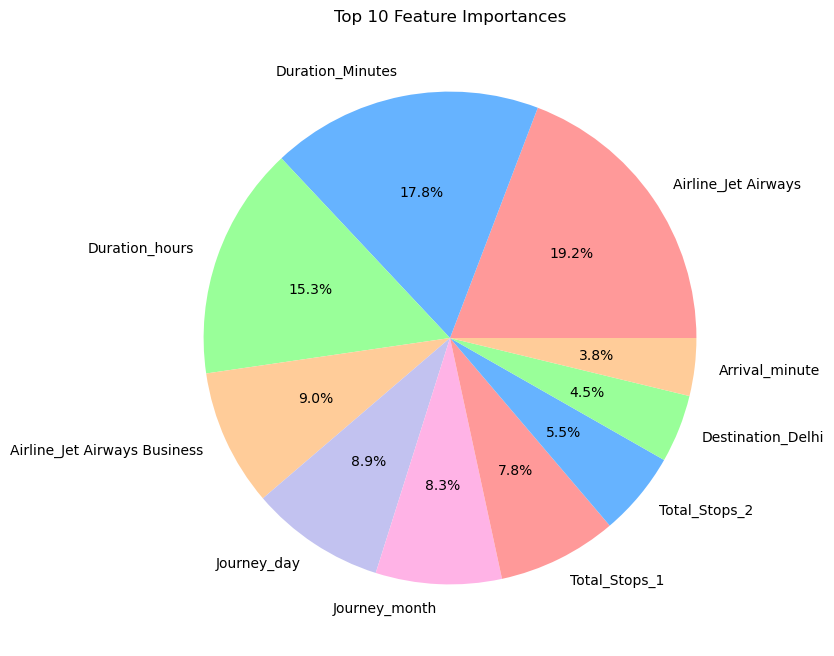

In [105]:
plt.figure(figsize=(8, 8))
fig_importances.nlargest(10).plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Top 10 Feature Importances')
plt.ylabel('')  # Remove y-label for clarity
plt.show()


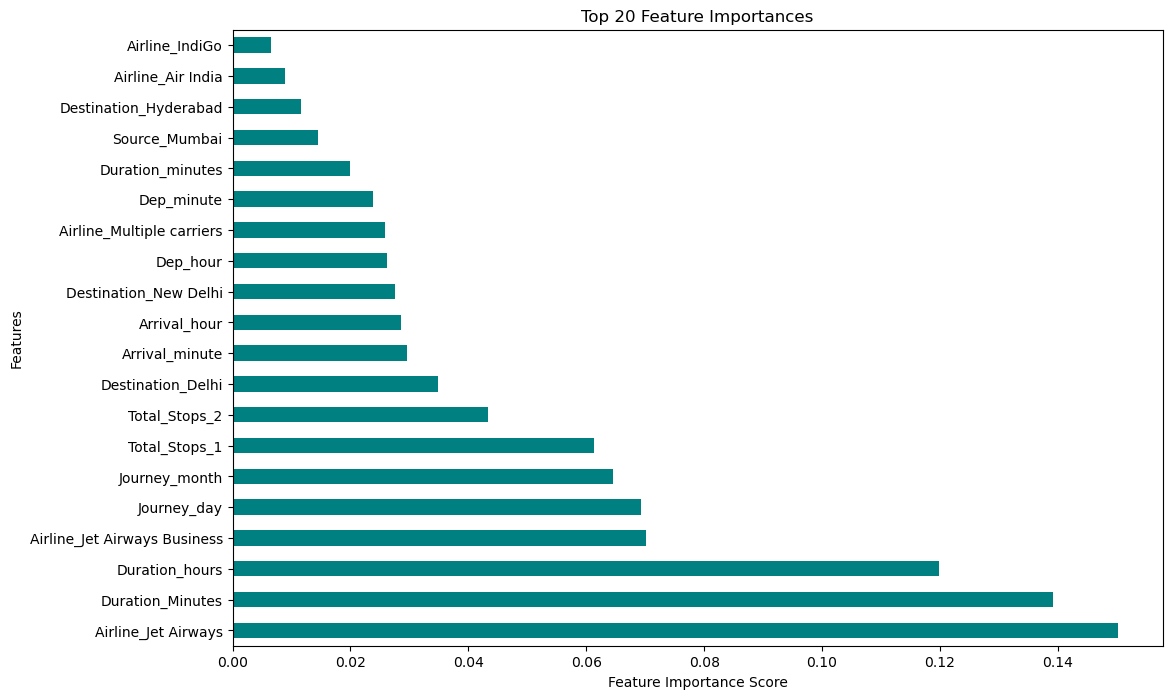

In [108]:
plt.figure(figsize=(12, 8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh', color='teal')
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

# Model fitting 

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [110]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [111]:
Y_pred = RF_reg.predict(X_test)

In [113]:
RF_reg.score(X_train, Y_train)

0.9196341127903891

In [114]:
RF_reg.score(X_test, Y_test)

0.7575819733457624

In [116]:
from sklearn import metrics

In [117]:
# Calculate r2_score
r2 = metrics.r2_score(Y_test, Y_pred)
print(r2)

0.7575819733457624
